#### Formats of dataset in the DBDP 


| Dataset Name                          | Kind                              | Format         |
|--------------------------------------|-----------------------------------|----------------|
| AdolescentsSchizophrenia             | EEG                               | csv(txt)       |
| Stanford Wearables                   | health data (various)             | csv            |
| Welltory HRV COVID19 Dataset         | health data (various)             | csv            |
| UCLA-rPPG                            | restricted                        | —              |
| WristPPGDuringExercise               | PPG+ECG                           | WFDB           |
| PPG-DaLiA                            | PPG                               | csv            |
| OxygenSaturationVariability          | oxygen saturation variability     | WFDB           |
| BIDMC_SpO2                           | PPG+ECG+HR+SpO2                   | WFDB+csv       |
| JCHR Diabetes                        | health data (various)             | csv(txt)       |
| Smartwatch Prediabetes              | health data (various)             | csv            |
| STAFF III Database                   | ECG                               | WFDB           |
| MIT-BIH Noise Stress Test Database   | ECG                               | WFDB           |
| MIT-BIH Arrhythmia Database          | ECG                               | WFDB           |
| Long Term ST Database                | ECG                               | WFDB           |
| European ST-T Database               | ECG                               | WFDB           |
| ANSI/AAMI EC13 Test Waveforms        | ECG                               | WFDB           |
| MHEALTH                              | health data (various)             | csv(log)       |
| STEP                                 | health data (various)             | csv            |
| Covidentify                          | restricted                        | —              |
| DREAMT                               | PSG                               | csv            |

#### Example to convert csv to wfdb:

1. Conver Stanford Wearables health data (csv) to WFDB 

Stanford Wearables have clear lables like:  "time","hr","accel_magnitude","skin_temp".

Convert Case Basis_001.csv and plot.

In [1]:
import pandas as pd
import wfdb
import numpy as np

# Load CSV
df = pd.read_csv('Basis_001.csv', parse_dates=['time'])

# Drop rows with all NaNs except for 'time'
df = df.dropna(subset=['accel_magnitude', 'skin_temp'], how='all')

# Convert to WFDB format
signals = df[['accel_magnitude', 'skin_temp']].to_numpy(dtype=np.float32)

# Fill NaNs with a placeholder (WFDB doesn't allow NaNs)
signals = np.nan_to_num(signals, nan=0.0)

fs = 1  # 1 Hz sampling rate 

# Write WFDB record
wfdb.wrsamp(
    'Basis_001',                      
    fs=fs,
    units=['mG', 'degF'],             
    sig_name=['accel', 'skin_temp'], 
    p_signal=signals
)

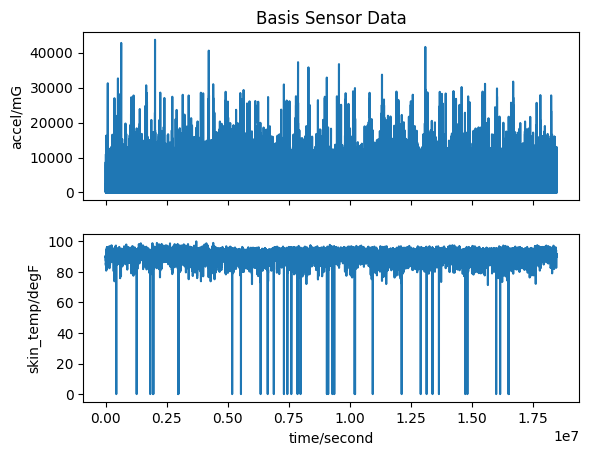

In [2]:
# Read and plot the record
record = wfdb.rdrecord('Basis_001')
wfdb.plot_wfdb(record=record, title='Basis Sensor Data')

2. convert AdolescentsSchizophrenia EEG (csv) to WFDB

AdolescentsSchizophrenia dose not have lable. We need to manually analyze and lable from the doc: http://brain.bio.msu.ru/eeg_schizophrenia.htm

Convert Case s53w1.eea and plot.


In [3]:
import numpy as np
import wfdb

# Load EEG file
file_path = 's53w1.eea' 
data = np.loadtxt(file_path)

# Reshape to 16 channels x 7680 samples
num_channels = 16
samples_per_channel = 7680
reshaped_data = data.reshape((num_channels, samples_per_channel))

# Transpose for WFDB (samples, channels)
signals = reshaped_data.T

# Channel names
channel_labels = [
    "F7", "F3", "F4", "F8", "T3", "C3", "Cz", "C4",
    "T4", "T5", "P3", "Pz", "P4", "T6", "O1", "O2"
]

# Write WFDB record
wfdb.wrsamp(
    's53w1',                   # Output filename prefix
    fs=128,                   # Sampling frequency
    units=['uV'] * 16,        # Microvolts
    sig_name=channel_labels,
    p_signal=signals.astype(np.float32)
)



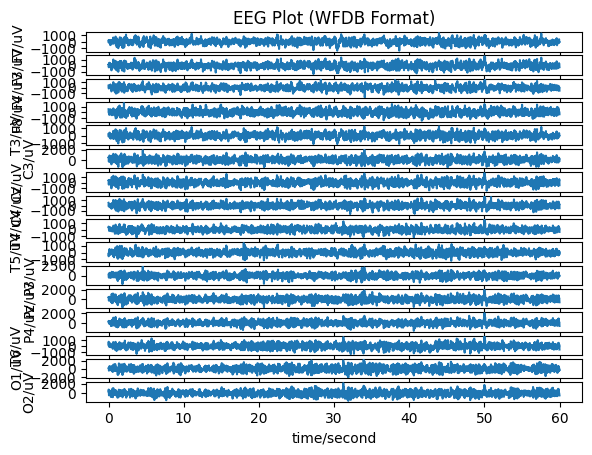

In [4]:
# Read and plot with wfdb
record = wfdb.rdrecord('s53w1')
wfdb.plot_wfdb(record=record, title='EEG Plot (WFDB Format)')

#### Open mHealth

Open mHealth is a platform that collect and integrate verious types of mobile devices. It is similar with Beiwe and Rapids.

It has unified data structures and provides [Schema library](https://www.openmhealth.org/documentation/#/schema-docs/schema-library). The data structures now become standand [IEEE P1752](https://opensource.ieee.org/omh/1752/)

The data is stored and transmit using JSON(JavaScript Object Notation). JSON is designed for Human-Readable and easy web transmit. Heavy data processing is needed to convert to CSV/WFDB dataset.

Openmhealth is written in Java. Need middle layers to run Openmhealth on python-based projects.

